In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import os 
os.chdir(r'D:\New folder (3)\archive (4)')

In [4]:
data_mobil = pd.read_csv("car data.csv")

In [5]:
data_mobil.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
data_mobil.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data_mobil.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
data_mobil.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
print(data_mobil["Fuel_Type"].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [12]:
print(data_mobil["Transmission"].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [13]:
print(data_mobil["Seller_Type"].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [14]:
tipe_bensin = data_mobil["Fuel_Type"]
tipe_penjual = data_mobil["Seller_Type"]
tipe_mobil = data_mobil["Transmission"]
harga_jual = data_mobil["Selling_Price"]

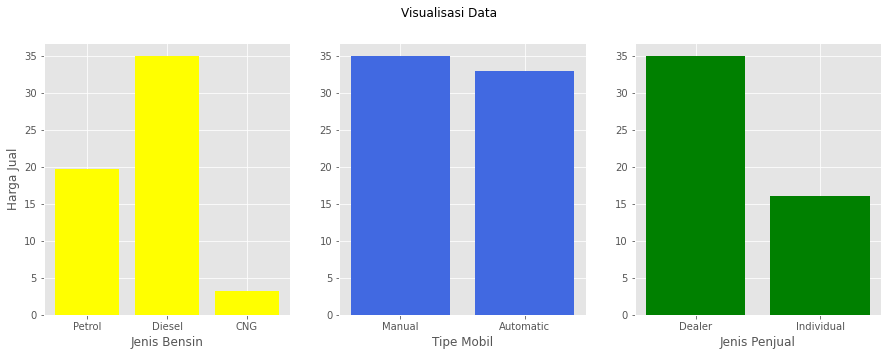

In [28]:
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
fig.suptitle("Visualisasi Data")
plt.subplot(1,3,1)
plt.bar(tipe_bensin,harga_jual, color="yellow")
plt.xlabel("Jenis Bensin")
plt.ylabel("Harga Jual")
plt.subplot(1,3,3)
plt.bar(tipe_penjual,harga_jual, color="green")
plt.xlabel("Jenis Penjual")
plt.subplot(1,3,2)
plt.bar(tipe_mobil,harga_jual, color="royalblue")
plt.xlabel("Tipe Mobil")
plt.show()

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

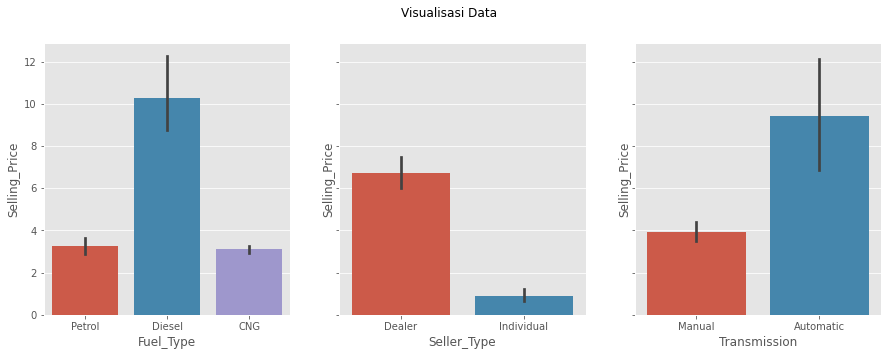

In [35]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True)
fig.suptitle("Visualisasi Data")
sns.barplot(x=tipe_bensin, y=harga_jual, ax=axes[0])
sns.barplot(x=tipe_penjual, y=harga_jual, ax=axes[1])
sns.barplot(x=tipe_mobil, y=harga_jual, ax=axes[2])

In [32]:
data_petrol = data_mobil.groupby("Fuel_Type").get_group("Petrol")
data_petrol.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [33]:
data_jenis_mobil = data_mobil.groupby("Transmission").get_group("Manual")
data_jenis_mobil.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2013.628352,3.931992,6.450383,34477.356322,0.038314
std,2.815445,3.777910,7.283720,26365.106104,0.192322
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.800000,1.200000,15001.000000,0.000000
50%,2014.000000,3.250000,5.800000,32000.000000,0.000000
75%,2016.000000,5.650000,9.400000,48000.000000,0.000000
max,2018.000000,35.000000,92.600000,213000.000000,1.000000


In [39]:
data_mobil.replace({"Fuel_Type":{"Petrol":0, "Diesel":1, "CNG":2}}, inplace=True)
data_mobil = pd.get_dummies(data_mobil, columns=['Seller_Type', 'Transmission'], drop_first=True)

In [40]:
data_mobil.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1
1,sx4,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1
4,swift,2014,4.60,6.87,42450,1,0,0,1


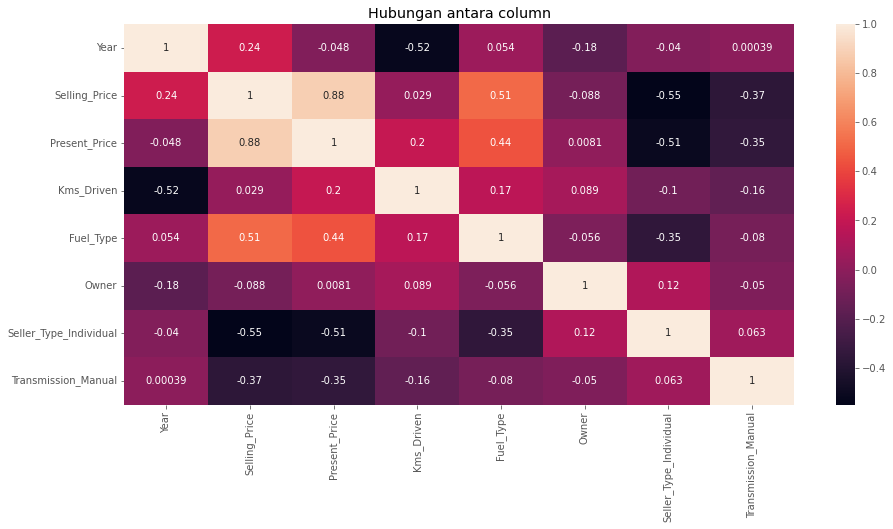

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(data_mobil.corr(), annot=True)
plt.title("Hubungan antara column")
plt.show()

<AxesSubplot:title={'center':'Hubungan antara harga jual dan harga sekarang'}, xlabel='Present_Price', ylabel='Selling_Price'>

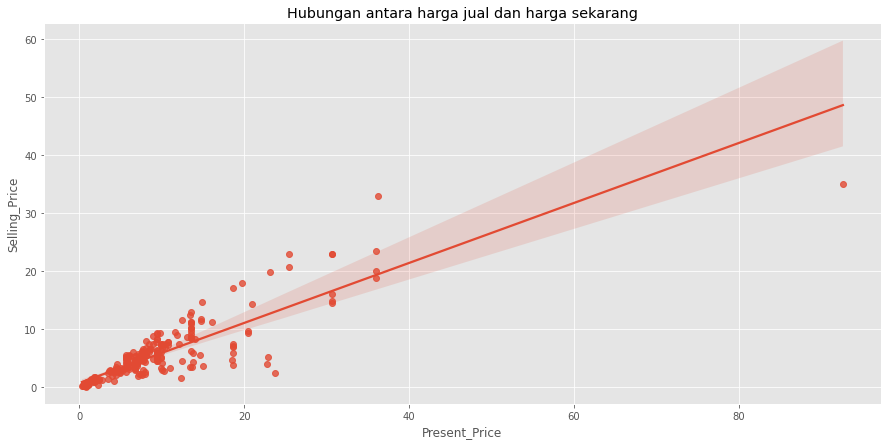

In [44]:
fig=plt.figure(figsize=(15,7))
plt.title("Hubungan antara harga jual dan harga sekarang")
sns.regplot(x="Present_Price", y="Selling_Price", data=data_mobil)

In [46]:
x = data_mobil.drop(['Car_Name','Selling_Price'], axis=1)
y = data_mobil["Selling_Price"]

In [48]:
print("shape dari x adalah : ", x.shape)
print("shape dari y adalah : ", y.shape)

shape dari x adalah :  (301, 7)
shape dari y adalah :  (301,)


In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [51]:
print("shape dari x_test adalah : ", x_test.shape)
print("shape dari x_train adalah : ", x_train.shape)
print("shape dari y_test adalah : ", y_test.shape)
print("shape dari y_train adalah : ", y_train.shape)

shape dari x_test adalah :  (91, 7)
shape dari x_train adalah :  (210, 7)
shape dari y_test adalah :  (91,)
shape dari y_train adalah :  (210,)


In [52]:
scale = StandardScaler()

In [53]:
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [54]:
model = LinearRegression()

In [55]:
model.fit(x_train,y_train)

LinearRegression()

In [58]:
predik = model.predict(x_test)

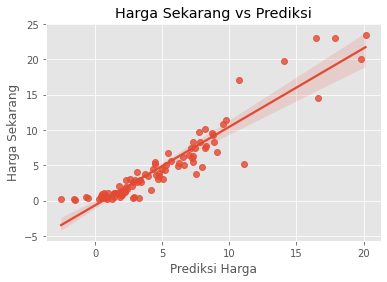

In [59]:
sns.regplot(x=predik, y=y_test)
plt.xlabel("Prediksi Harga")
plt.ylabel("Harga Sekarang")
plt.title("Harga Sekarang vs Prediksi")
plt.show()

In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pyppeteer

     ---------------------------------------- 83.4/83.4 kB 1.2 MB/s eta 0:00:00
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
     -------------------------------------- 101.4/101.4 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
